In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
minerals = ["Manganese", "Lithium", "Cobalt", "Nickel"]

In [3]:
top_reserves_by_mineral = pd.read_csv("ReservesByMineral.csv")
reserves_totals = top_reserves_by_mineral.groupby('Mineral', as_index=False)["Aggregate Reserves & Resources (tonnes)"].agg('sum')

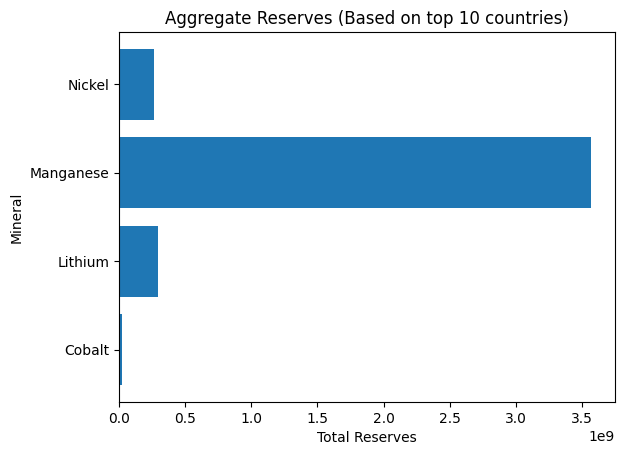

In [4]:
plt.figure()
plt.barh(y = reserves_totals['Mineral'], width = reserves_totals["Aggregate Reserves & Resources (tonnes)"])
plt.title("Aggregate Reserves (Based on top 10 countries)")
plt.xlabel("Total Reserves")
plt.ylabel("Mineral")
plt.show()

In [155]:
data.columns

Index(['Metals & Mining Properties', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [163]:
import re
combined = None
for i, mineral in enumerate(minerals):
    
    data = pd.read_excel("SPGlobal_MetalsAndMiningProperties-Nov-2024.xls", sheet_name = mineral, header=1)
    print(f"Read {mineral}")

    data.dropna(subset="Primary Reserves and Resources", inplace = True)
    data["Reserves & Resources As Of Date"] = pd.to_datetime(data["Reserves & Resources As Of Date"])
    data["Primary Mineral"] = mineral
    
    if i == 0:
        combined = data
        continue
    
    combined = pd.concat([combined, data], ignore_index=True)
    
    

Read Manganese
Read Lithium
Read Cobalt
Read Nickel


In [165]:
import plotly.express as px

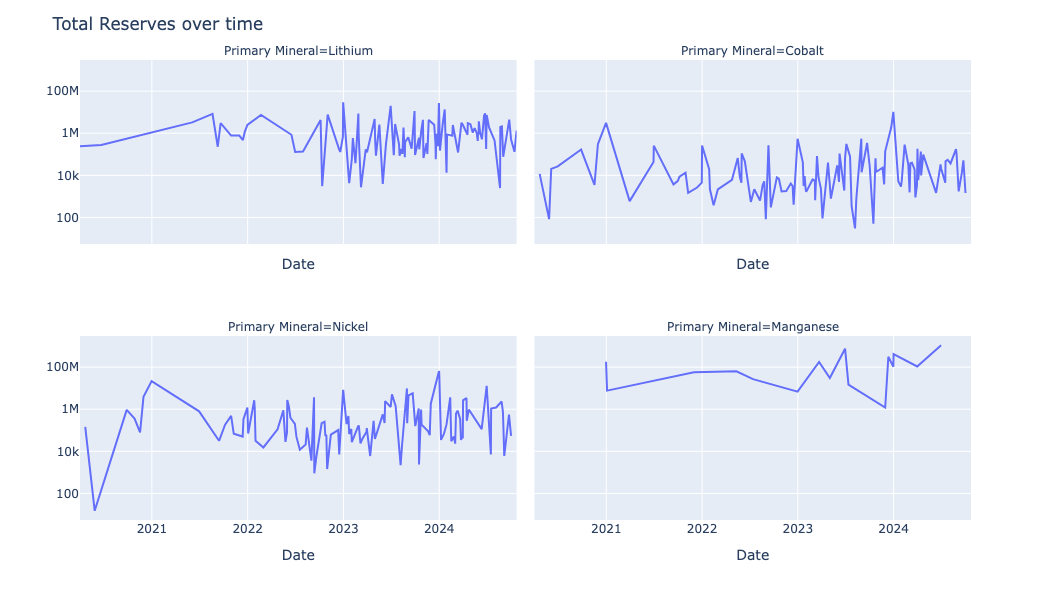

In [166]:
reserves_over_time = combined \
        .groupby(["Reserves & Resources As Of Date", "Primary Mineral"], as_index = False)["Primary Reserves and Resources"] \
        .agg("sum")


fig = px.line(reserves_over_time, x="Reserves & Resources As Of Date", facet_col = "Primary Mineral", 
        y="Primary Reserves and Resources", log_y = True, facet_col_wrap=2, facet_row_spacing=0.2)

fig.update_xaxes(title_text="Date")
fig.update_layout(title = "Total Reserves over time", height = 600, width = 1000)
fig.update_yaxes(title_text=None)
fig.show()

In [167]:
def get_breakdown_by_mine(df, year):
    reserves_from_year = df[df["Reserves & Resources As Of Date"].dt.year == year].copy()
    reserves_from_year["Property ID"] = reserves_from_year["Property ID"].astype(str)
    
    fig = px.bar(
        reserves_from_year.sort_values('Primary Mineral'),
        y="Primary Mineral",
        x="Primary Reserves and Resources",
        color="Property ID",
        title=f"Primary Resources and Reserves per Mine in {year}",
        barmode="stack",  # Use "stack" for a stacked bar chart
        log_x = True
    )
    
    fig.update_layout(
        xaxis_title="Primary Reserves and Resources (tonnes)",
        xaxis_tickangle=45
    )
    return fig
    

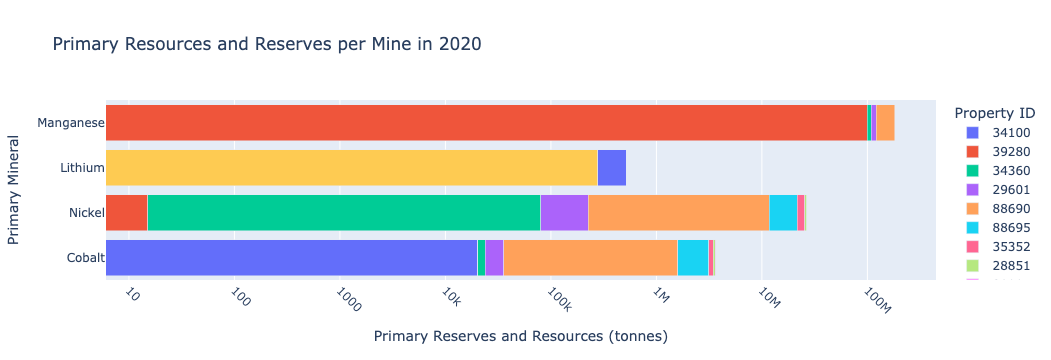

In [168]:
get_breakdown_by_mine(combined, 2020)


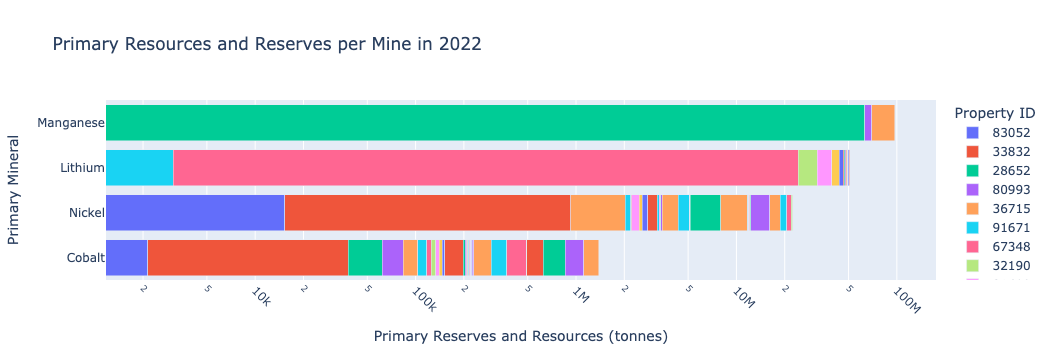

In [170]:
get_breakdown_by_mine(combined, 2022)